### Default Payments of Credit Card Clients in Taiwan from 2005 - UCI

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [12]:
fraudData = pd.read_csv("data2.csv", header=1)

In [13]:
fraudData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
fraudData = fraudData.rename(columns = {'default payment next month':'y'})
fraudData.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'y'],
      dtype='object')

In [15]:
totalrows = fraudData.count()
print (totalrows)
print (fraudData.shape)

ID           30000
LIMIT_BAL    30000
SEX          30000
EDUCATION    30000
MARRIAGE     30000
AGE          30000
PAY_0        30000
PAY_2        30000
PAY_3        30000
PAY_4        30000
PAY_5        30000
PAY_6        30000
BILL_AMT1    30000
BILL_AMT2    30000
BILL_AMT3    30000
BILL_AMT4    30000
BILL_AMT5    30000
BILL_AMT6    30000
PAY_AMT1     30000
PAY_AMT2     30000
PAY_AMT3     30000
PAY_AMT4     30000
PAY_AMT5     30000
PAY_AMT6     30000
y            30000
dtype: int64
(30000, 25)


In [16]:
fraudData.y.value_counts()

0    23364
1     6636
Name: y, dtype: int64

#### The data is highly skewed. One class is represented by 23364 and the other by 6636.

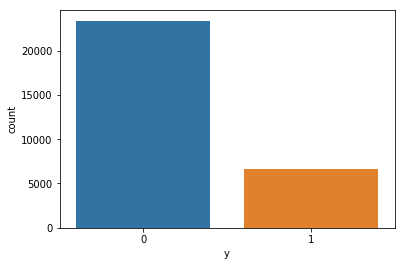

In [17]:
sns.countplot(fraudData.y)

In [18]:
# we do not need ID for classifiers.
df = fraudData.drop("ID",axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
# Separating target variable
Y = df['y']
X = df.drop("y",axis=1)
print (X.shape, Y.shape)
print (Y.head())

(30000, 23) (30000,)
0    1
1    1
2    0
3    0
4    0
Name: y, dtype: int64


In [21]:
#Converting strings to numerical for ML algorithms.
X = pd.get_dummies(X, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

In [22]:
print (X.shape)

(30000, 23)


In [23]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


Everything is already in integers. That is why number of coloumns are same.

In [25]:
print (X.columns.values)

['LIMIT_BAL' 'SEX' 'EDUCATION' 'MARRIAGE' 'AGE' 'PAY_0' 'PAY_2' 'PAY_3'
 'PAY_4' 'PAY_5' 'PAY_6' 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3' 'BILL_AMT4'
 'BILL_AMT5' 'BILL_AMT6' 'PAY_AMT1' 'PAY_AMT2' 'PAY_AMT3' 'PAY_AMT4'
 'PAY_AMT5' 'PAY_AMT6']


Applying algos to set a baseline.
Splitting Test and Train data.

In [26]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size=0.3, random_state=42)

In [29]:
clf=RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(XTrain , YTrain)
YPredicted = clf.predict(XTest)
print (accuracy_score(YTest, YPredicted)*100)

81.33333333333333


In [31]:
from sklearn.metrics import f1_score
print (f1_score(YTest,YPredicted))

0.45771465461588123


Feature ranking:
1. feature 5 (0.101254)
2. feature 4 (0.065707)
3. feature 0 (0.060589)
4. feature 11 (0.060117)
5. feature 12 (0.053994)
6. feature 13 (0.052090)
7. feature 17 (0.050537)
8. feature 14 (0.050186)
9. feature 16 (0.050052)
10. feature 15 (0.048785)
11. feature 18 (0.047659)
12. feature 22 (0.046245)
13. feature 19 (0.045297)
14. feature 6 (0.043654)
15. feature 20 (0.042944)
16. feature 21 (0.042600)
17. feature 7 (0.025009)
18. feature 8 (0.023827)
19. feature 10 (0.022192)
20. feature 2 (0.021065)
21. feature 9 (0.019647)
22. feature 3 (0.014191)
23. feature 1 (0.012357)


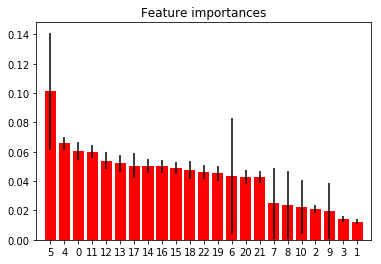

In [32]:
# Calulating feature importance based on Random Tree Classifier.

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### EXPORATORY DATA ANALYSIS

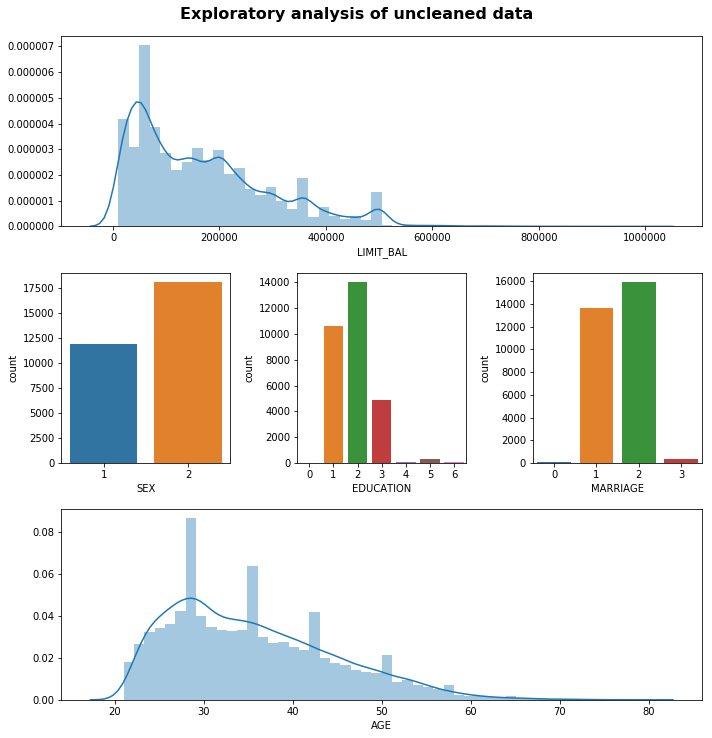

In [33]:

# examine distribution of values
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0),)
ax3 = plt.subplot2grid((3, 3), (1, 1),)
ax4 = plt.subplot2grid((3, 3), (1, 2),)
ax5 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
sns.distplot(df.LIMIT_BAL, ax=ax1);
sns.countplot(df.SEX, ax=ax2)
sns.countplot(df.EDUCATION, ax=ax3)
sns.countplot(df.MARRIAGE, ax=ax4)
sns.distplot(df.AGE, ax=ax5);
plt.tight_layout()
plt.suptitle('Exploratory analysis of uncleaned data',y=1.02,fontsize=16,weight='bold');

Drawing insights from the results, most of the data for credit limit is concentrated till 500000, so dropping values higher than that.
Also for age, cutting of at 70.

In [34]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [35]:
df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Binning age and credit limit variables.

In [36]:
# Benefits ease of analysis and machine learning algorithms
agebins = np.arange(20, 70, 10)
agebinlabels = ['{}s'.format(i, j) for i, j in zip(agebins, agebins[1:])]
df['AGE_GROUP'] = pd.cut(df.AGE, bins=agebins, labels=agebinlabels, right=False)

creditlimitbins = np.arange(0, 500000, 50000)
creditbinlabels = ['{}-{}'.format(i//1000, j//1000) for i, j in zip(creditlimitbins, creditlimitbins[1:])]
df['LIMIT_BAL_GROUP'] = pd.cut(df.LIMIT_BAL, bins=creditlimitbins, labels=creditbinlabels)

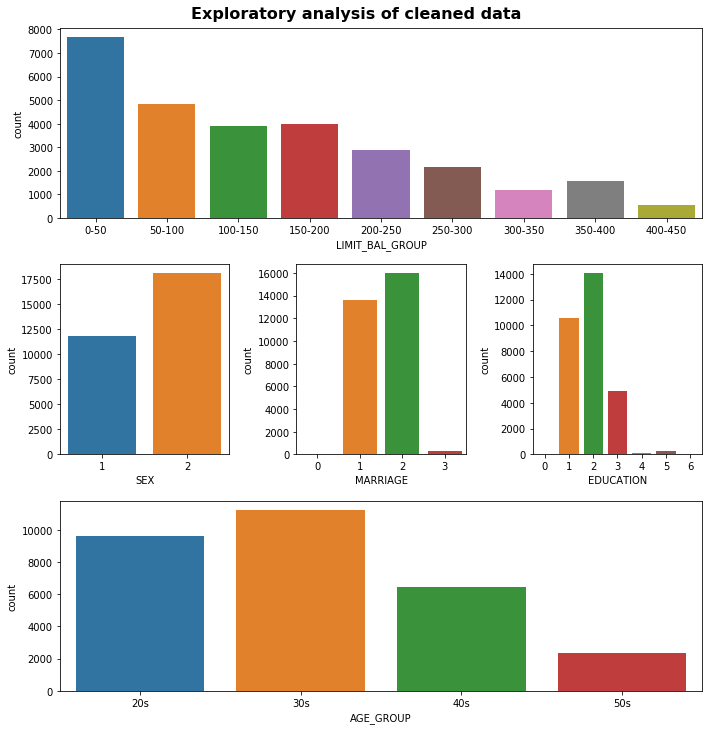

In [37]:
# examine distribution of values following data cleaning
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0),)
ax3 = plt.subplot2grid((3, 3), (1, 1),)
ax4 = plt.subplot2grid((3, 3), (1, 2),)
ax5 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
plotlist = ['LIMIT_BAL_GROUP', 'SEX', 'MARRIAGE', 'EDUCATION', 'AGE_GROUP']
for col, ax in zip(plotlist, fig.get_axes()):
    sns.countplot(x=col, data=df, ax=ax)
plt.suptitle('Exploratory analysis of cleaned data', y=1.01, fontsize=16, weight='bold')
plt.tight_layout()

#### FINDING Correlation with target for every feature 

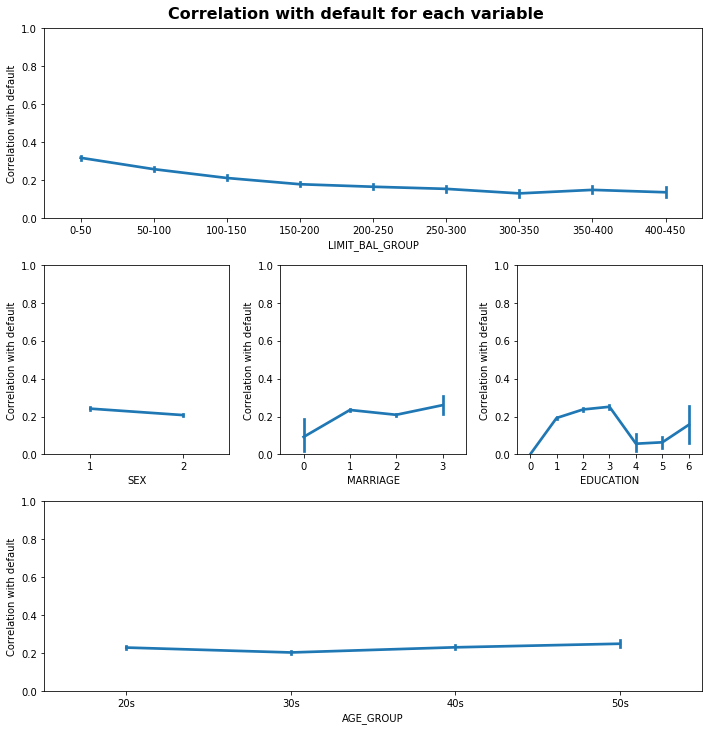

In [38]:
# construct figure from pointplots
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), sharey=ax1)
ax3 = plt.subplot2grid((3, 3), (1, 1), sharey=ax1)
ax4 = plt.subplot2grid((3, 3), (1, 2), sharey=ax1)
ax5 = plt.subplot2grid((3, 3), (2, 0), colspan=3, sharey=ax1)
plotlist = ['LIMIT_BAL_GROUP', 'SEX', 'MARRIAGE', 'EDUCATION', 'AGE_GROUP']
for col, ax in zip(plotlist, fig.get_axes()):
    sns.pointplot(x=col, y='y', data=df, ax=ax, markers='')
    ax.set_ylabel('Correlation with default')
ax1.set_ylim(0.0, 1)
plt.suptitle('Correlation with default for each variable', y=1.01, fontsize=16, weight='bold')
plt.tight_layout()

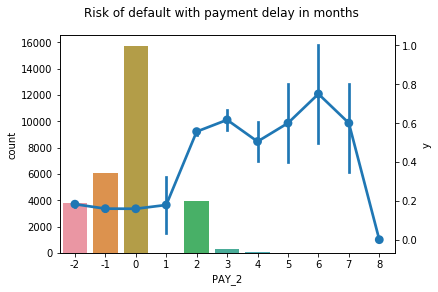

In [39]:
ax1 = sns.countplot(x='PAY_2', data=df)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='PAY_2', y='y', data=df, zorder=10, ax=ax2)
ax1.grid(False)
ax2.grid(False)
plt.suptitle('Risk of default with payment delay in months');

There is a high correlation at PAY_2 = 2, there is no correlation at PAY-2 = -2,-1,0. Need to investigate this for other features.


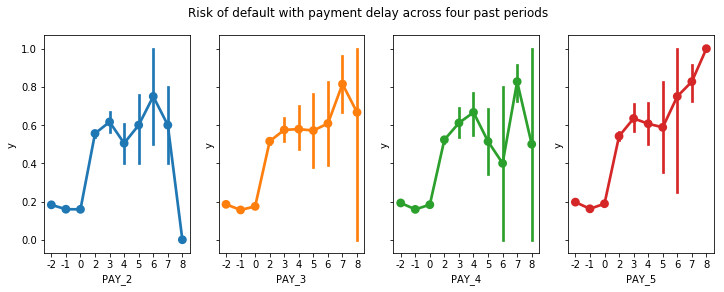

In [40]:
payment_delay_cols = ['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']
fig, ax = plt.subplots(1, 4, figsize=(12, 4), sharey=True)
for i,(column, ax) in enumerate(zip(payment_delay_cols, ax)):
    sns.pointplot(x=column, y='y', data=df[df[column]!=1], ax=ax, color=sns.color_palette()[i])
plt.suptitle('Risk of default with payment delay across four past periods');

AHAA! Same behavior! Hence, cutting off at PAY = 2

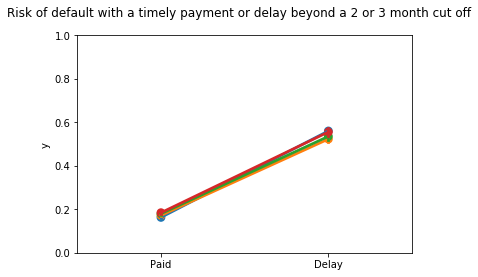

In [41]:
cutoff_point = {'PAY_2': 2, 'PAY_3': 2, 'PAY_4': 2, 'PAY_5': 2}
for color, column in enumerate(cutoff_point.keys()):
    df[column+'_TEST'] =  df[column].map(lambda x: 'Delay' if x >= cutoff_point[column] else 'Paid')
    sns.pointplot(x=column+'_TEST', y='y', data=df, order=['Paid', 'Delay'], color=sns.color_palette()[color])
plt.xlabel('')
plt.ylim(0, 1);
plt.suptitle('Risk of default with a timely payment or delay beyond a 2 or 3 month cut off');

In [42]:
df.shape

(30000, 30)

In [43]:
df.columns.values

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'y', 'AGE_GROUP', 'LIMIT_BAL_GROUP', 'PAY_2_TEST',
       'PAY_3_TEST', 'PAY_4_TEST', 'PAY_5_TEST'], dtype=object)

In [44]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,y,AGE_GROUP,LIMIT_BAL_GROUP,PAY_2_TEST,PAY_3_TEST,PAY_4_TEST,PAY_5_TEST
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,1,20s,0-50,Delay,Paid,Paid,Paid
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,0,2000,1,20s,100-150,Delay,Paid,Paid,Paid
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,5000,0,30s,50-100,Paid,Paid,Paid,Paid
3,50000,2,2,1,37,0,0,0,0,0,...,1100,1069,1000,0,30s,0-50,Paid,Paid,Paid,Paid
4,50000,1,2,1,57,-1,0,-1,0,0,...,9000,689,679,0,50s,0-50,Paid,Paid,Paid,Paid


In [45]:
X = df[['SEX', 'EDUCATION', 'MARRIAGE','BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_0','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'y', 'AGE_GROUP', 'LIMIT_BAL_GROUP', 'PAY_4_TEST',
       'PAY_5_TEST', 'PAY_2_TEST', 'PAY_3_TEST']]

In [46]:
X.shape

(30000, 23)

In [47]:
X = pd.get_dummies(X, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

#X['PAY_4_TEST'] = X['PAY_4_TEST'].map({2:'Paid', 1:'Delay'})
#X['PAY_2_TEST'] = X['PAY_2_TEST'].map({2:'Paid', 1:'Delay'})
#X['PAY_3_TEST'] = X['PAY_3_TEST'].map({2:'Paid', 1:'Delay'})
#X['PAY_5_TEST'] = X['PAY_5_TEST'].map({2:'Paid', 1:'Delay'})

In [48]:
YFinal = X.y
XFinal = X.drop('y',axis=1)


In [49]:
XTrainFinal, XTestFinal, YTrainFinal, YTestFinal = train_test_split(XFinal,YFinal, test_size=0.3, random_state=42)

Random Forest

In [36]:
parameters = {'n_estimators':[3,4,5,6,7,8,9,50,100], 'criterion':['gini','entropy'], 'max_depth':[1,2,3,4,5], 'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]}

kfold=10
clfFinal=RandomForestClassifier(random_state=42)

nIters=10
clfRfc1 = GridSearchCV(clfFinal, parameters,cv=kfold)
clfRfc1.fit(XTrainFinal , YTrainFinal)
clfFinal = clfRfc1.best_estimator_
clfFinal.fit(XTrainFinal , YTrainFinal)
YPredictedFinal = clfFinal.predict(XTestFinal)
print accuracy_score(YTestFinal, YPredictedFinal)*100

81.7111111111


KNN, SCM, Decision Tree, Naive Bayes

In [37]:
def compare4models():
    """ returns a figure based from four machine learning models"""
    
    names = ["Nearest Neighbors",
             "Linear SVM",
             "Decision Tree",
             "Naive Bayes"]

    classifiers = [KNeighborsClassifier(),
                   SVC(),
                   DecisionTreeClassifier(),
                   GaussianNB()]
    
    cmaps = ['Reds',
             'Greens',
             'Blues',
             'Oranges']
    
    numrows = int(np.ceil(len(names)/2))
    fig, ax = plt.subplots(nrows=numrows, ncols=2, figsize=(8, numrows*4))
    
    for name,clf,ax,cmap in zip(names, classifiers, ax.ravel(), cmaps):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = clf.score(X_test, y_test)
        accscore = accuracy_score(y_test,y_pred)
        fscore = f1_score(y_test,y_pred)
        print name,accscore
        confmatrix = confusion_matrix(y_test, y_pred)
        true0,true1 = [sum(confmatrix[i]) for i in [0,1]]
        pred0,pred1 = [sum(i) for i in zip(*confmatrix)]
        ylabels=['Not default: {}'.format(true0), 'Default: {}'.format(true1)]
        xlabels=['Not default: {}'.format(pred0), 'Default: {}'.format(pred1)]
        sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,
                    xticklabels=xlabels,
                    yticklabels=ylabels,
                    fmt='g',
                    ax=ax,
                    vmax=len(X_test),
                    vmin=0,
                    cbar=False,
                    cmap=cmap)
        ax.set_xlabel('Truth')
        ax.set_ylabel('Predicted')
        ax.set_title('{} (Score: {})'.format(name, np.round(score, decimals=3)), size=14)
    return fig,confmatrix

ONLY PERSONAL DATA

In [50]:
modeldata = df[['LIMIT_BAL_GROUP', 'AGE_GROUP', 'SEX', 'MARRIAGE', 'EDUCATION']]
X = pd.get_dummies(modeldata)
y = df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Nearest Neighbors 0.732333333333


/Users/sahilaggarwal/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Linear SVM 0.780333333333
Decision Tree 0.775
Naive Bayes 0.597


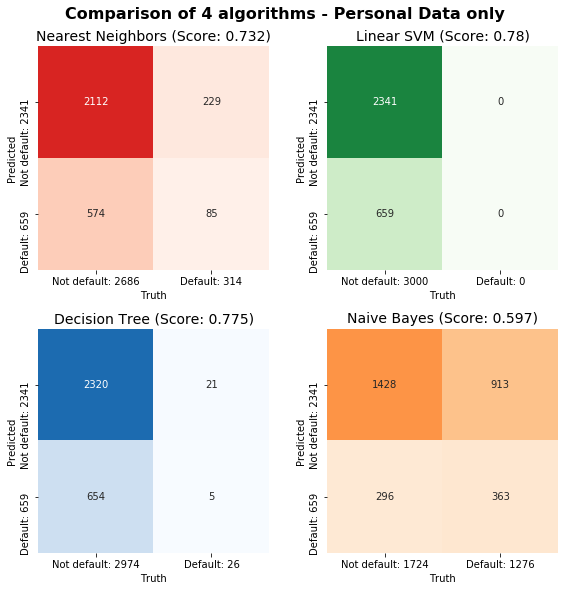

In [40]:
fig,confmatrix = compare4models()
plt.suptitle('Comparison of 4 algorithms - Personal Data only', y=1.02, size=16, weight='bold')
plt.tight_layout()

PERSONAL DATA WITH PAYMENT HISTORY

Nearest Neighbors 0.767
Linear SVM 0.791333333333
Decision Tree 0.780333333333
Naive Bayes 0.760333333333


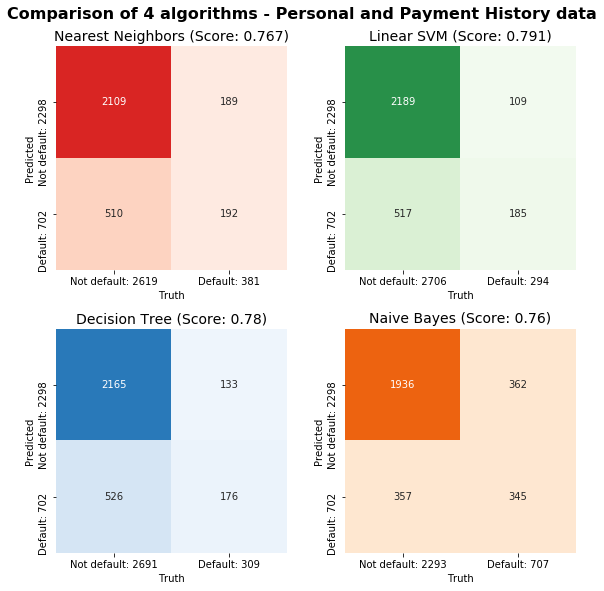

In [41]:
# One-hot encoding to produce a sparse matrix suitable for input to sklearn
# Add extra columns with payment history data
modeldata = df[['LIMIT_BAL_GROUP', 'AGE_GROUP', 'SEX', 'MARRIAGE', 'EDUCATION',
                'PAY_2_TEST', 'PAY_3_TEST', 'PAY_4_TEST', 'PAY_5_TEST']]
X = pd.get_dummies(modeldata)
y = df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=31)
compare4models()
plt.suptitle('Comparison of 4 algorithms - Personal and Payment History data', y=1.02, size=16, weight='bold')
plt.tight_layout()

Calculating Baseline Frequency - Null Accuracy

In [52]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    2341
1     659
Name: y, dtype: int64

In [53]:
# calculate the percentage of ones - because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
max(y_test.mean(), 1-y_test.mean())

0.7803333333333333